In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
file = "housing.csv"
df=pd.read_csv(file,delim_whitespace=True,names=name)
df.head()

#     ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#     INDUS: proportion of non-retail business acres per town
#     CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#     NOX: nitric oxides concentration (parts per 10 million)
#     1https://archive.ics.uci.edu/ml/datasets/Housing
#     123
#     20.2. Load the Dataset 124
#     RM: average number of rooms per dwelling
#     AGE: proportion of owner-occupied units built prior to 1940
#     DIS: weighted distances to ﬁve Boston employment centers
#     RAD: index of accessibility to radial highways
#     TAX: full-value property-tax rate per $10,000
#     PTRATIO: pupil-teacher ratio by town 
#     12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
#     13. LSTAT: % lower status of the population
#     MEDV: Median value of owner-occupied homes in $1000s
#     We can see that the input attributes have a mixture of units.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
row,col=df.shape
print(f"Table has {row}rows and {col} columns" )
df.info()

Table has 506rows and 14 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
#Using 
from sklearn.linear_model import LinearRegression

df.describe()
x = df[['LSTAT']].to_numpy()
y = df[['MEDV']].to_numpy()

# print(x.shape)
# print(y.shape)

(506, 1)
(506, 1)


Linear Regression
RMSE: 6.558372421381305
R^2:  0.5149044976402835
(404, 1)


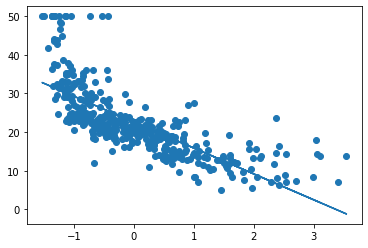

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
#y=scaler.fit(y)
x=scaler.transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 22)
model = LinearRegression()
model.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score 
prediction=model.predict(x_test)
Rsquared = r2_score(y_test, prediction)
RMSE = np.sqrt(mean_squared_error(y_test, prediction))
print("Linear Regression")
print("RMSE:",RMSE)
print("R^2: ",Rsquared)
# print(x_train.shape)
# print(y_train.shape)
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))

RMSE: 6.558372421381304
R^2:  0.5857844942953512


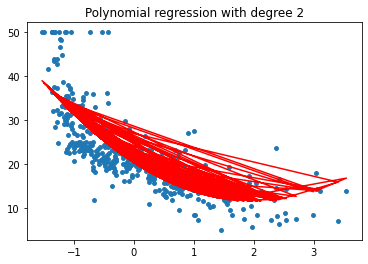

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
polynomial = PolynomialFeatures(degree=2)
model_2 = make_pipeline(polynomial,model)
model_2.fit(x_train,y_train)
prediction_2=model_2.predict(x_test)
Rsquared = r2_score(y_test, prediction_2)
RMSER = np.sqrt(mean_squared_error(y_test, prediction_2))
print("Polynomial Regression")
print("RMSE:",RMSE)
print("R^2: ",Rsquared)
plt.figure()
plt.scatter(x_train,y_train,s=15)
plt.plot(x_train,model_2.predict(x_train),color="r")
plt.title("Polynomial regression with degree "+str(2))
plt.show()

RMSE: 5.701888359028291
R^2:  0.6333324151139389


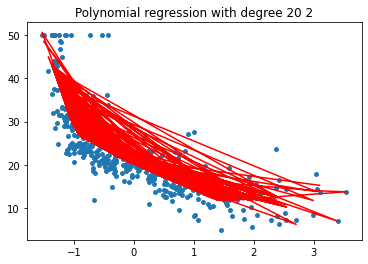

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
polynomial = PolynomialFeatures(degree=20)
model_2 = make_pipeline(polynomial,model)
model_2.fit(x_train,y_train)
prediction_2=model_2.predict(x_test)
Rsquared = r2_score(y_test, prediction_2)
RMSE = np.sqrt(mean_squared_error(y_test, prediction_2))
print("polynomial with 20 degree")
print("RMSE:",RMSE)
print("R^2: ",Rsquared)
plt.figure()
plt.scatter(x_train,y_train,s=15)
plt.plot(x_train,model_2.predict(x_train),color="r")
plt.title("Polynomial regression with degree 20 "+str(2))
plt.show()

In [12]:
x2 = df[['LSTAT','RM',"PTRATIO"]].to_numpy()
y2 = df[['MEDV']].to_numpy()


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x2)
#y=scaler.fit(y)
x2=scaler.transform(x2)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2,y,test_size=0.2,random_state = 22)
model = LinearRegression()
model.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score 
prediction=model.predict(x_test)
Rsquared  = r2_score(y_test, prediction)
RMSE = np.sqrt(mean_squared_error(y_test, prediction))
adjusted_r_squared = 1 - (1-Rsquared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#Adjusted R Squared = 1 – [((1 – R2) * (n – 1)) / (n – k – 1)]
print("Multiple Features 'LSTAT','RM','PTRATIO'")
print("RMSE:",RMSE)
print("adjusted R Squared",adjusted_r_squared)
print("R^2: ",Rsquared)
# print(x_train.shape)
# print(y_train.shape)

RMSE: 4.974434993788515
adjusted R Squared 0.7123807719300752
R^2:  0.7209239173182909
